Alec Daniel Jurado Luna 1734696          
Cristian Alejandro Luna Pineda 1819020         
Diego Alejandro Montoya Ortega 1748924         
Brandon Gerardo Coria Peña 1911618      
Miguel Angel Solis Corpus 1908279       
Ivan Patricio Lomas Castillo 1847798      
Rodolfo Atilano Santos 1856728



In [553]:
import cv2
import glob
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [554]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [555]:
clas_names = ["0", "1", "2", "3", "4",
              "5", "6", "7", "8", "9"]

In [556]:
x_train = x_train / 255.
x_test = x_test / 255.

In [558]:
x_train.shape

(60000, 28, 28)

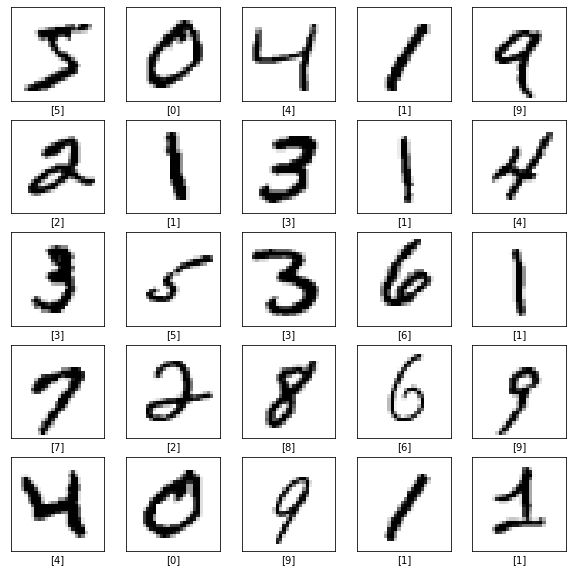

In [557]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel([y_train[i]])
plt.show()

In [559]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [560]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [561]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2627 - accuracy: 0.9256 - val_loss: 0.1396 - val_accuracy: 0.9579
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1173 - accuracy: 0.9658 - val_loss: 0.1017 - val_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0792 - accuracy: 0.9762 - val_loss: 0.0834 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0593 - accuracy: 0.9819 - val_loss: 0.0752 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0457 - accuracy: 0.9863 - val_loss: 0.0736 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0791 - val_accuracy: 0.9755
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0744 - val_accuracy:

313/313 - 1s - loss: 0.0835 - accuracy: 0.9776 - 541ms/epoch - 2ms/step


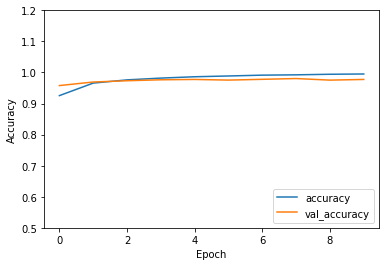

In [562]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.2])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [564]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0835 - accuracy: 0.9776 - 498ms/epoch - 2ms/step

Test accuracy: 0.9775999784469604


In [565]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


# Prediccion 1


In [566]:
predictions[5]

array([2.5782560e-14, 9.9999017e-01, 8.2785417e-10, 1.3334965e-09,
       2.2633452e-07, 1.1500229e-11, 2.9955424e-12, 6.8927557e-06,
       2.6532664e-06, 1.6024033e-10], dtype=float32)

In [567]:
np.argmax(predictions[5])

1

In [568]:
y_test[5]

1

# Prediccion 2

In [569]:
predictions[10]

array([9.9990731e-01, 9.3657856e-15, 9.2599941e-05, 1.0644716e-10,
       1.0174164e-18, 1.0769526e-08, 3.8913464e-09, 1.4561054e-08,
       1.7396895e-10, 1.1102256e-08], dtype=float32)

In [570]:
np.argmax(predictions[10])

0

In [571]:
y_test[10]

0

# Prediccion 3

In [574]:
predictions[50]

array([2.6388258e-07, 7.1857958e-10, 4.6620148e-09, 3.3379702e-06,
       2.2001885e-10, 6.0431215e-05, 9.9993581e-01, 2.0864616e-13,
       1.4226276e-07, 7.5603301e-09], dtype=float32)

In [575]:
np.argmax(predictions[50])

6

In [576]:
y_test[50]

6

# Modelo de entrenado a una sola imagen


In [577]:
img = x_test[1]

print(img.shape)

(28, 28)


In [579]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 1, 28, 28)


In [580]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 59ms/step
[[2.0092396e-14 4.8524984e-09 1.0000000e+00 2.2021037e-08 1.6043403e-24
  1.7752969e-10 9.5095095e-12 1.3081403e-18 8.5456566e-09 7.5904264e-19]]


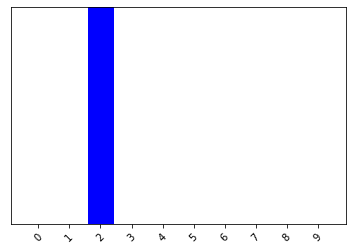

In [581]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [582]:
np.argmax(predictions_single[0])

2